In [1]:
import xlrd
import xlwt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
data = pd.read_excel(r'C:\Users\Admin\Desktop/Documents/WORKS OF MY DM PROJECT/removing_all_none.xlsx')

del data['FROM DATE']
del data['TO DATE']

names = data.columns

ModuleNotFoundError: No module named 'seaborn'

In [2]:
data.drop_duplicates(inplace=True)  # removing duplicates

In [3]:
limit = {}
def IQR_outlier(dt,name):

    q1 = dt.quantile(.25)
    q3 = dt.quantile(.75)
    iqr = q3 -q1
    l_limit = q1 - 1.5*iqr
    r_limit = q3 + 1.5*iqr
    l_limit = round(l_limit,2)
    r_limit = round(r_limit,2)
    limit[name]=[l_limit,r_limit]

def removal_outlier(st,name):
    st = st[st < limit[name][1]]
    st = st[st > limit[name][0]]
    return st
    

for i in range(len(names)):
    IQR_outlier(data[names[i]],names[i])

for i in range(len(names)):
    data[names[i]] = removal_outlier(data[names[i]],names[i])
    
data = data.dropna() #to remove NaN values

In [4]:
data.describe() #10250 rows

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
count,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000,10250.000000
mean,29.840606,977.875407,186.178732,52.789366,63.084952,96.092257,192.617477,1.130559,0.936471,14.052337,32.755523,25.587200,9.390158,28.095881,8.760907,40.299637,1.149113
std,4.541722,4.937947,107.617515,36.216506,27.940288,131.635532,101.894035,0.460502,0.855817,13.138093,17.566358,12.578633,9.408340,16.389743,5.655685,36.699542,0.473508
min,15.730000,967.000000,5.000000,0.000000,5.000000,4.330000,0.100000,0.100000,0.000000,0.000000,0.100000,4.300000,0.000000,0.100000,0.100000,0.200000,0.010000
25%,26.900000,973.500000,105.250000,28.000000,40.925000,9.330000,98.307500,0.800000,0.300000,1.200000,20.400000,15.500000,2.930000,15.900000,4.770000,11.007500,0.800000
50%,29.700000,977.670000,174.000000,44.000000,60.400000,15.100000,216.100000,1.100000,0.600000,13.900000,28.800000,23.000000,5.600000,23.850000,7.900000,27.400000,1.100000
75%,32.900000,982.000000,246.000000,69.000000,98.900000,148.692500,276.330000,1.400000,1.300000,22.900000,43.370000,33.000000,12.400000,36.300000,12.000000,59.000000,1.400000
max,43.530000,990.330000,599.000000,190.000000,99.100000,500.330000,359.900000,2.430000,3.900000,60.100000,86.970000,73.500000,46.700000,95.600000,26.000000,151.100000,2.930000


count    10250.000000
mean         2.899438
std          1.143446
min          0.000000
25%          1.974529
50%          2.722466
75%          3.744161
max          5.575917
Name: NO, dtype: float64


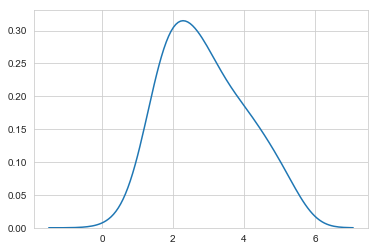

In [33]:
import seaborn as sns
data["NO"]+=1
df=data["NO"].apply(np.log2)
print(df.describe())
sns.set_style('whitegrid')
sns.kdeplot(np.array(df), bw=0.5)

In [32]:
data["NO"]-=1
data

,AT,BP,PM10,PM2.5,RH,SR,WD,WS,BENZENE,TOLUENE,NH3,NO2,NO,NOX,SO2,OZONE,CO
0,19.23,987.00,382.0,125.0,79.67,7.00,240.67,0.90,0.40,2.53,60.60,30.60,37.87,68.47,4.67,4.73,1.40
1,19.10,987.00,382.0,125.0,80.33,7.00,267.67,0.77,1.00,1.77,42.13,41.30,31.47,61.77,3.10,14.13,1.40
2,19.03,987.00,382.0,125.0,80.67,7.33,188.33,0.33,0.33,2.00,66.73,28.70,43.17,71.80,4.30,4.33,1.40
5,18.43,986.00,399.0,130.0,83.33,7.00,271.33,0.90,0.40,1.70,67.00,26.80,43.03,69.43,3.93,5.07,0.93
6,18.53,986.00,345.0,138.0,82.00,7.33,265.67,0.87,0.33,1.70,69.57,28.00,35.23,63.33,4.90,5.13,1.07
7,18.20,986.00,345.0,138.0,84.33,8.00,245.67,0.60,0.30,1.87,71.73,24.03,38.00,62.00,4.87,5.20,1.10
8,17.73,986.00,345.0,138.0,86.67,8.00,248.67,0.80,0.30,1.90,78.70,25.77,30.07,55.73,5.03,4.47,1.07
9,17.53,986.00,345.0,138.0,88.00,8.00,270.67,0.83,0.37,2.07,84.90,22.93,26.17,49.07,5.00,5.07,1.07
10,17.87,986.00,339.0,175.0,85.67,8.33,257.33,1.00,1.53,0.83,30.03,41.07,24.20,69.73,1.90,20.20,1.07
11,17.43,986.00,339.0,175.0,88.33,9.00,229.33,0.80,1.50,0.73,32.47,35.83,17.10,62.37,1.60,22.30,0.87
